<a href="https://colab.research.google.com/github/21skar4/Facebook-Prophet-/blob/main/Stock_Price_prediction_using_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price prediction using Facebook Prophet 

#Enter the Ticker of the stock

In [ ]:
stock = 'MSFT'

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default="colab"

## Importing the Dataset & Exploring it

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

from datetime import date


period = '12mo' # 1mo, 1y,...

data = yf.download(stock, period=period)


df = pd.DataFrame(data)

df.to_csv(str('FB_Prophet') + '_' + 'stock' + '.csv')
msft_6M = df

[*********************100%***********************]  1 of 1 completed


In [ ]:
df=pd.read_csv('FB_Prophet_stock.csv')

In [ ]:
#read_csv function from pandas

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,296.425476,299.535913,292.849444,296.319722,295.111600,2.976901e+07
std,24.483309,24.121633,24.604605,24.408119,23.969499,1.106939e+07
min,243.860001,245.740005,241.509995,242.259995,242.259995,1.390020e+07
25%,282.114998,286.555008,278.392502,280.794998,280.017799,2.239125e+07
50%,296.274994,298.930008,293.584991,296.169998,294.831268,2.827405e+07
75%,309.690002,312.385002,306.649994,310.325012,308.835022,3.458385e+07
max,344.619995,349.670013,342.200012,343.109985,341.606354,9.042890e+07


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df , x="Date" , y="Close")

In [ ]:
px.line(df, x="Date", y="Close")

In [ ]:
px.area(df,x="Date",y="Volume")

In [ ]:
px.bar(df, y="Volume")

In [ ]:
px.box(df, y="Close")

# Understanding Facebook Prophet

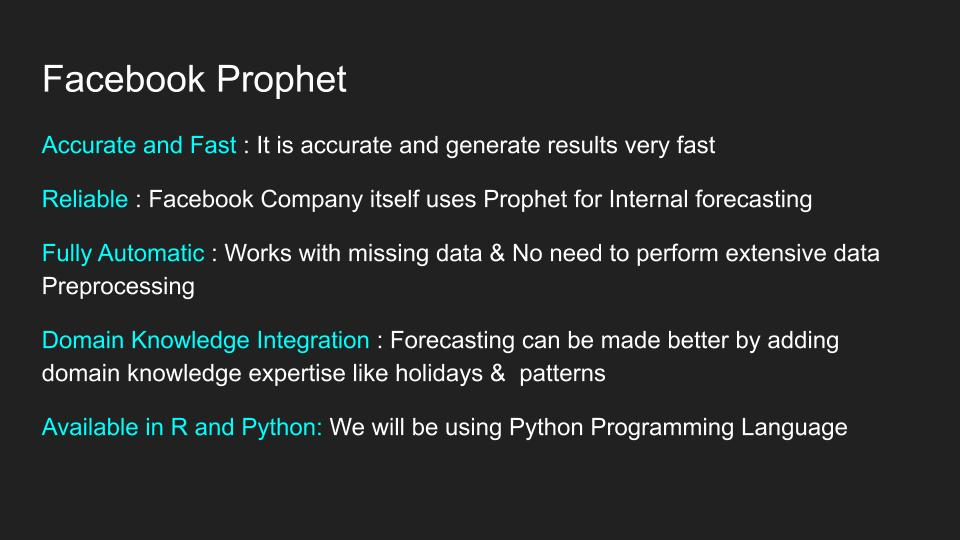

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-16,282.070007,284.100006,279.459991,280.750000,278.476105,26186800
1,2021-07-19,278.929993,280.369995,274.450012,277.010010,274.766388,32935600
2,2021-07-20,278.029999,280.970001,276.260010,279.320007,277.057709,26259700
3,2021-07-21,278.899994,281.519989,277.290009,281.399994,279.120819,24364300
4,2021-07-22,283.839996,286.420013,283.420013,286.140015,283.822449,23384100
...,...,...,...,...,...,...,...
247,2022-07-11,265.649994,266.529999,262.179993,264.510010,264.510010,19455200
248,2022-07-12,265.880005,265.940002,252.039993,253.669998,253.669998,35868500
249,2022-07-13,250.190002,253.550003,248.110001,252.720001,252.720001,29497400
250,2022-07-14,250.570007,255.139999,245.940002,254.080002,254.080002,25102800


In [ ]:
columns=["Date","Close"]
ndf = pd.DataFrame(df, columns=columns)

In [ ]:
ndf

,Date,Close
0,2021-07-16,280.750000
1,2021-07-19,277.010010
2,2021-07-20,279.320007
3,2021-07-21,281.399994
4,2021-07-22,286.140015
...,...,...
247,2022-07-11,264.510010
248,2022-07-12,253.669998
249,2022-07-13,252.720001
250,2022-07-14,254.080002


In [ ]:
prophet_df = ndf.rename(columns={'Date': 'ds', 'Close': 'y'})

In [ ]:
  prophet_df

,ds,y
0,2021-07-16,280.750000
1,2021-07-19,277.010010
2,2021-07-20,279.320007
3,2021-07-21,281.399994
4,2021-07-22,286.140015
...,...,...
247,2022-07-11,264.510010
248,2022-07-12,253.669998
249,2022-07-13,252.720001
250,2022-07-14,254.080002


## Creating Facebook Prophet Model

In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-16,282.239630,270.220051,295.604035,282.239630,282.239630,0.371403,0.371403,0.371403,0.371403,0.371403,0.371403,0.0,0.0,0.0,282.611033
1,2021-07-19,283.050609,270.585130,296.764058,283.050609,283.050609,0.316454,0.316454,0.316454,0.316454,0.316454,0.316454,0.0,0.0,0.0,283.367063
2,2021-07-20,283.320936,270.501624,295.898321,283.320936,283.320936,-0.193384,-0.193384,-0.193384,-0.193384,-0.193384,-0.193384,0.0,0.0,0.0,283.127552
3,2021-07-21,283.591263,272.560804,297.276788,283.591263,283.591263,1.169285,1.169285,1.169285,1.169285,1.169285,1.169285,0.0,0.0,0.0,284.760548
4,2021-07-22,283.861589,271.001229,296.145446,283.861589,283.861589,0.206535,0.206535,0.206535,0.206535,0.206535,0.206535,0.0,0.0,0.0,284.068124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2022-08-10,241.982767,230.100599,257.060434,240.298511,243.602899,1.169285,1.169285,1.169285,1.169285,1.169285,1.169285,0.0,0.0,0.0,243.152052
278,2022-08-11,241.633014,228.520746,255.071587,239.859018,243.353519,0.206535,0.206535,0.206535,0.206535,0.206535,0.206535,0.0,0.0,0.0,241.839549
279,2022-08-12,241.283261,228.869912,255.092325,239.396185,243.100201,0.371403,0.371403,0.371403,0.371403,0.371403,0.371403,0.0,0.0,0.0,241.654664
280,2022-08-13,240.933508,226.412777,252.661686,238.918187,242.883423,-0.935147,-0.935147,-0.935147,-0.935147,-0.935147,-0.935147,0.0,0.0,0.0,239.998362


##Forecasted price curve

In [ ]:
px.line(forecast, x='ds', y='yhat')

##Forecasted vs Original along with Future 30 days price

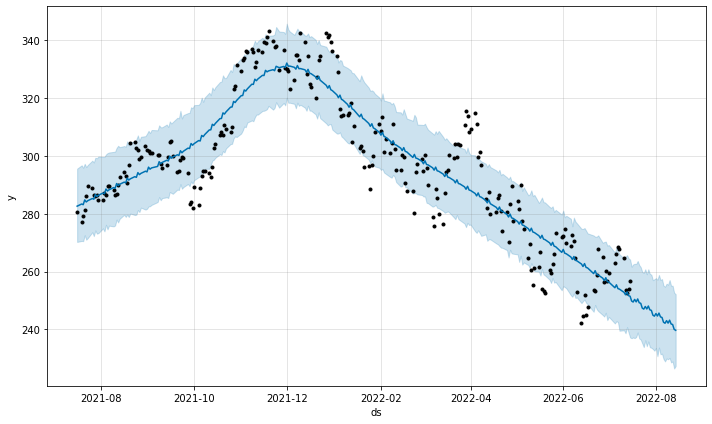

In [ ]:
figure= m.plot(forecast, xlabel ='ds', ylabel ='y')

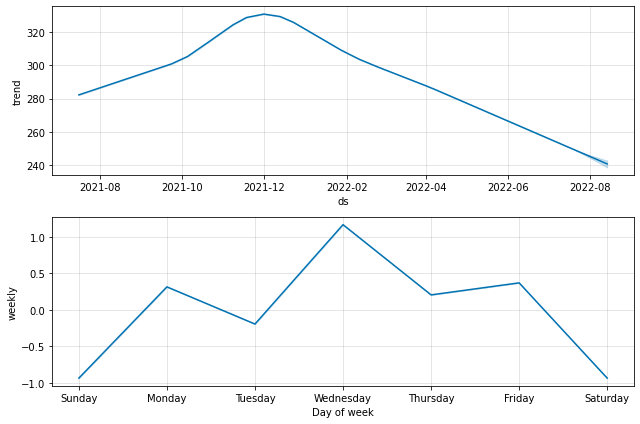

In [ ]:
figure2=m.plot_components(forecast)

##Future 30 days price curve

In [ ]:
Future_30_days_price= forecast[len(forecast)-30:]
px.line(Future_30_days_price, x='ds', y='yhat')


##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv(stock + '_forecast.csv')
files.download(stock+'_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Downloading the Future 30 days data

In [ ]:
Future_30_days_price.to_csv(stock + '_Future_30_days_price.csv')
files.download(stock+'_Future_30_days_price.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>